# Predicting heart disease using machine learning


## Problem definition:
> Given clinical parameters about a patient can we predict if that person has heart disease?

## Data:
> Can be found [here](https://www.kaggle.com/ronitf/heart-disease-uci).

> This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

#### Features:
* age: age
* sex: sex
* cp: chest pain type (4 values)
* trestbps: resting blood pressure
* chol: serum cholestoral in mg/dl
* fbs: fasting blood sugar > 120 mg/dl
* restecg: resting electrocardiographic results (values 0,1,2)
* thalach: maximum heart rate achieved
* exang: exercise induced angina
* oldpeak: oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

#### Label:
* target: patient has heart disease or not (0=no, 1=yes)

## Evaluation:
> If the model can reach 90+% accuracy, then it'll be feasable to integrate in an application.

### Tools

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, RocCurveDisplay

### Load data

In [2]:
heart_disease = pd.read_csv('./heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### EDA (exploratory data analysis)

In [3]:
heart_disease.isna().sum() # df is full

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# how many people have heart disease and how many doesn't 
heart_disease.target.value_counts()

1    165
0    138
Name: target, dtype: int64

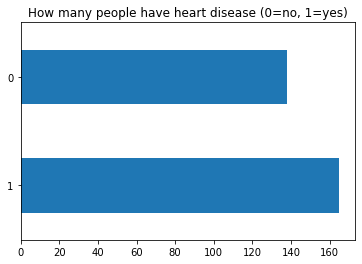

In [5]:
heart_disease.target.value_counts().plot(kind='barh', title='How many people have heart disease (0=no, 1=yes)');

In [6]:
heart_disease.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_disease.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
pd.crosstab(heart_disease.target, heart_disease.sex)

sex,0,1
target,,
0,24,114
1,72,93


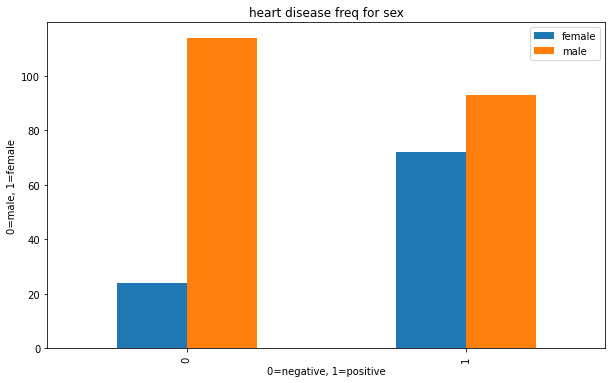

In [10]:
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind='bar',
                                                         figsize=(10, 6),
                                                         title='heart disease freq for sex',
                                                         xlabel='0=negative, 1=positive',
                                                         ylabel='0=male, 1=female');
plt.legend(['female', 'male']);

In [11]:
heart_disease.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

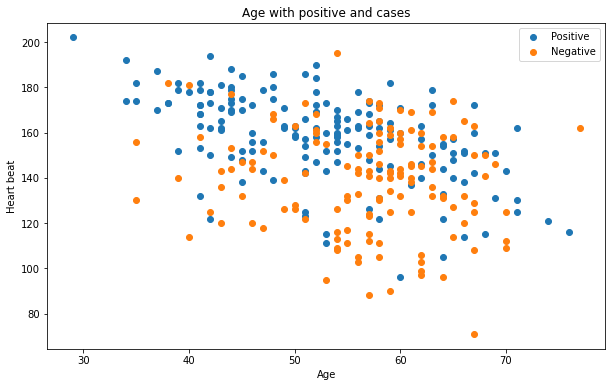

In [12]:
plt.figure(figsize=(10, 6));

plt.scatter(heart_disease.age[heart_disease.target == 1],
           heart_disease.thalach[heart_disease.target == 1]);

plt.scatter(heart_disease.age[heart_disease.target == 0],
           heart_disease.thalach[heart_disease.target == 0]);

plt.title('Age with positive and cases');
plt.xlabel('Age');
plt.ylabel('Heart beat');
plt.legend(['Positive', 'Negative']);

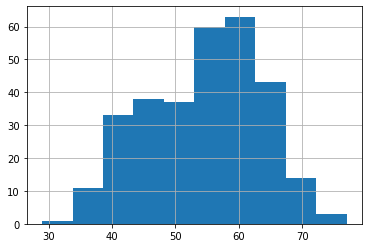

In [13]:
#mayority of people are 55-65 years old
heart_disease.age.hist();

In [14]:
pd.crosstab(heart_disease.cp, heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


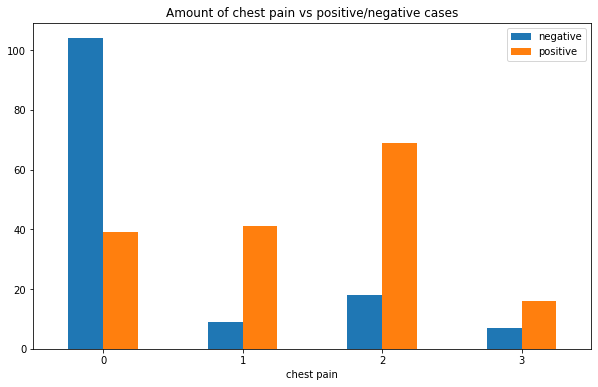

In [15]:
pd.crosstab(heart_disease.cp, heart_disease.target).plot(kind='bar', figsize=(10, 6));
plt.xlabel('chest pain');
plt.legend(['negative','positive']);
plt.title('Amount of chest pain vs positive/negative cases');
plt.xticks(rotation=0);

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


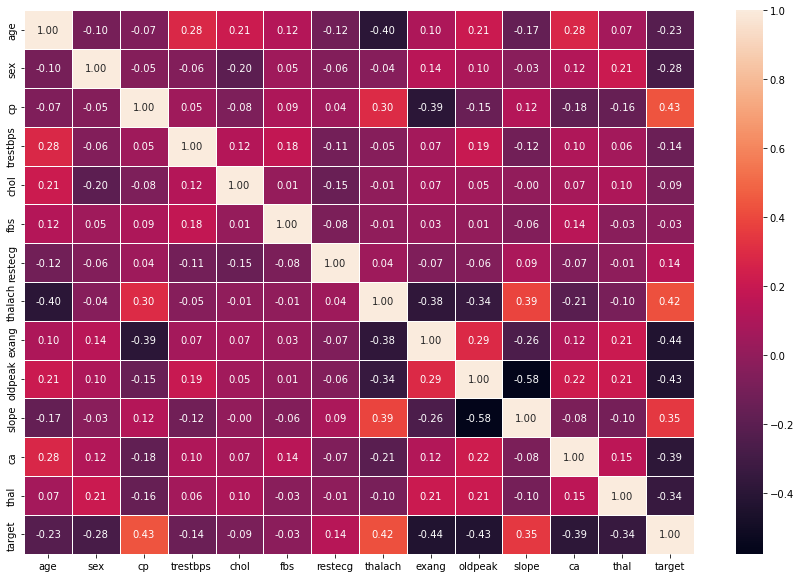

In [18]:
#correlation matrix
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f');

## Modelling

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#split data into X & y

#features
X = heart_disease.drop('target', axis=1)

#label
y = heart_disease.target

In [21]:
np.random.seed(42)

#split data into training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
len(X_train), len(y_train)

(242, 242)

In [23]:
#put models in dict
models = {
    "Logistic regression": LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random forest classifier":RandomForestClassifier()
}

#fits, trains & score models
def fit_score_model(X_train, X_test, y_train, y_testm, models=models):
    np.random.seed(42)    
    models_score = {}
    
    for name, model in models.items():
        #fit model
        model.fit(X_train, y_train)
        #evaluate model
        models_score[name] = model.score(X_test, y_test)
        
    return models_score

In [24]:
models_scores = fit_score_model(X_train, X_test, y_train, y_test)
models_scores

/home/a1ds/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest classifier': 0.8360655737704918}

### Model comparison

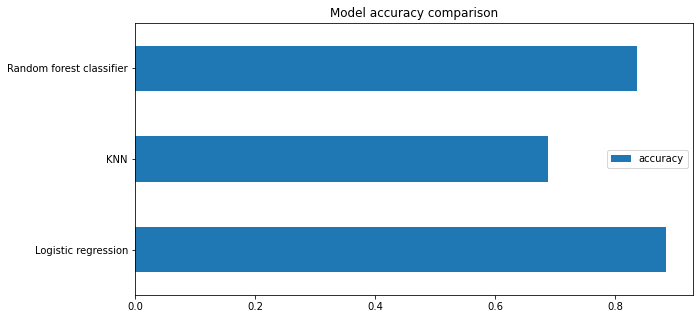

In [25]:
models_compare = pd.DataFrame(models_scores, index=['accuracy']).T.plot(kind='barh', figsize=(10, 5));
models_compare;
plt.title('Model accuracy comparison');

###  Hyperparameter tuning with RandomizedSearchCV

In [26]:
#tune Logistic regression using RandomizedSearchCV

#create hyperparameter grid for Logistic regression
lr_grid = {
 "C": np.logspace(-4, 4, 20),
 "solver": ['liblinear']
}

#create hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators":np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [27]:
#tune LogisticRegression

np.random.seed(42)

#setup random hyperparmeter search for LogisticRegression
rscv_lr = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=lr_grid, 
                            cv=5,
                            n_iter=20,
                            verbose=True)

#fit model
rscv_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
#best found params
rscv_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [29]:
#score model
rscv_lr.score(X_test, y_test)

0.8852459016393442

In [30]:
#Random forest classifier using RandomizedSearchCV
np.random.seed(42)

#setup random hyperparameter search for Random forest classifier
rscv_rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

#fit model
rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
#best found params
rscv_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [32]:
#score model
rscv_rf.score(X_test, y_test)

0.8688524590163934

###  Hyperparameter tuning with GridSearchCV
>Since the LogisticRegression has provided the best scores so far, I'll continue tuning it
in this instance with GridSearchCV

In [33]:
# change one value in hyperparameters
lr_grid = {
 "C": np.logspace(-4, 4, 50),
 "penalty":['l1', 'l2'],
 "solver": ['liblinear'],
 "max_iter":np.arange(100, 10000, 500)
}

#setup grid hyperparameters search for logisticRegression
gsv_lr = GridSearchCV(estimator=LogisticRegression(),
                     param_grid=lr_grid,
                     cv=5,
                     verbose=True)

#fit model
gsv_lr.fit(X_train, y_train)

Fitting 5 folds for each of 9900 candidates, totalling 49500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.685113...
       3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400,
       4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500,
       5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600,
       6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700,
       7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800,
       8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [34]:
#best params
gsv_lr.best_params_

{'C': 0.18420699693267145,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [36]:
#model score
gsv_lr.score(X_test, y_test)

0.8852459016393442

### Evaluating the model

In [38]:
#make predictions with model
y_preds = gsv_lr.predict(X_test)

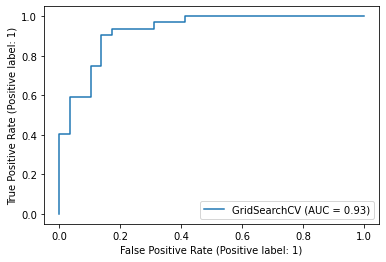

In [45]:
#use ROC curve and AUC metric
RocCurveDisplay.from_estimator(gsv_lr, X_test, y_test);

In [54]:
#confusion matrix
sns.set(font_scale=1)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel('model predictions')
    plt.ylabel('true labels')

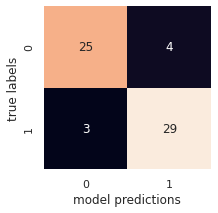

In [56]:
plot_conf_mat(y_test, y_preds)

In [58]:
#Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [59]:
#calculate evaluation metrics using CV
#best hyper params

gsv_lr.best_params_

{'C': 0.18420699693267145,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [61]:
#create a new classifier with best params
model = LogisticRegression(C=0.18420699693267145,
                          max_iter=100,
                          penalty='l2',
                          solver='liblinear')

In [68]:
#CV accuracy
cv_acc = cross_val_score(model, X, y, cv=5, scoring='accuracy')
cv_acc = np.mean(cv_acc)

cv_acc

0.8446994535519124

In [70]:
#CV precision
cv_pres = cross_val_score(model, X, y, cv=5, scoring='precision')
cv_pres = np.mean(cv_pres)

cv_pres

0.8207936507936507

In [73]:
#CV recall
cv_recall = cross_val_score(model, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)

cv_recall

0.9212121212121213

In [76]:
#CV f1-score
cv_f1 = cross_val_score(model, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)

cv_f1

0.8673007976269721

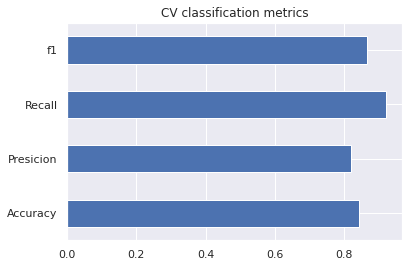

In [81]:
#visualize cv metrics
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Presicion": cv_pres,
    "Recall": cv_recall,
    "f1": cv_f1
}, index=[0])

cv_metrics.T.plot.barh(title='CV classification metrics', legend=False);

### Feature importance
Most important features in model

In [83]:
#best params
gsv_lr.best_params_

{'C': 0.18420699693267145,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [84]:
#create a new classifier with best params
model = LogisticRegression(C=0.18420699693267145,
                          max_iter=100,
                          penalty='l2',
                          solver='liblinear')

In [86]:
model.fit(X_train, y_train)

LogisticRegression(C=0.18420699693267145, solver='liblinear')

In [88]:
# find coefficient 
model.coef_

array([[ 0.00274534, -0.8246619 ,  0.64946587, -0.01155522, -0.00162953,
         0.04067028,  0.29769479,  0.02448922, -0.58200187, -0.56321728,
         0.43464708, -0.62480489, -0.66201556]])

In [90]:
feature_dict = dict(zip(heart_disease.columns, list(model.coef_[0])))
feature_dict

{'age': 0.0027453389310658624,
 'sex': -0.8246618959707309,
 'cp': 0.6494658718311663,
 'trestbps': -0.011555217601775702,
 'chol': -0.0016295281581984332,
 'fbs': 0.04067028305183856,
 'restecg': 0.2976947914624433,
 'thalach': 0.02448921768961956,
 'exang': -0.5820018714196844,
 'oldpeak': -0.5632172821945594,
 'slope': 0.43464707834638255,
 'ca': -0.6248048900506629,
 'thal': -0.6620155646062625}

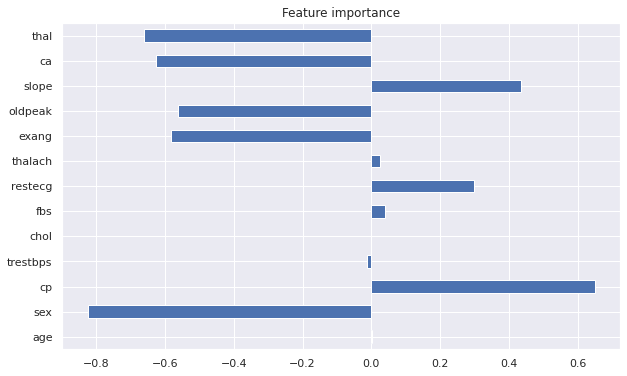

In [94]:
#visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.barh(title='Feature importance', legend=False, figsize=(10, 6));

### I can deduse that the positive features are the ones that affect if a person has heart disease

### The model didn't reach 90+% accuracy :( 

* Maybe due to lack of data

In [95]:
#save model
from joblib import dump, load

dump(gsv_lr, 'heart_disease_model_v1.joblib')

['heart_disease_model_v1.joblib']